In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
# Carregar os dados do arquivo JSON
with open('./output_pdfs/combined_maintenance_data.json') as file:
    data = json.load(file)

# Transformar os dados em um DataFrame do Pandas
df = pd.json_normalize(data)

In [43]:
print(df.columns)
# Mostrar as primeiras linhas do DataFrame e as colunas
# print(df.head())
# print(df.columns)

Index(['om', 'issue_center', 'center_plant', 'om_description',
       'equipment_fields.equipment_number',
       'equipment_fields.description_equipment',
       'equipment_fields.cost_center', 'equipment_fields.criticality',
       'equipment_fields.installation_location',
       'equipment_fields.description_installation_location',
       'equipment_fields.upper_installation_location',
       'equipment_fields.description_upper_installation_location',
       'equipment_fields.equipment_characteristics', 'order_fields.start_date',
       'order_fields.start_time', 'order_fields.end_date',
       'order_fields.end_time', 'order_fields.duration',
       'order_fields.priority', 'order_fields.maintenance_type',
       'order_fields.activity_type', 'order_fields.starting_point',
       'order_fields.length', 'order_fields.plan_maintenance',
       'order_fields.plan_description', 'order_fields.operation_condition',
       'order_fields.order_system_status', 'order_fields.order_user_statu

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/2619054206.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




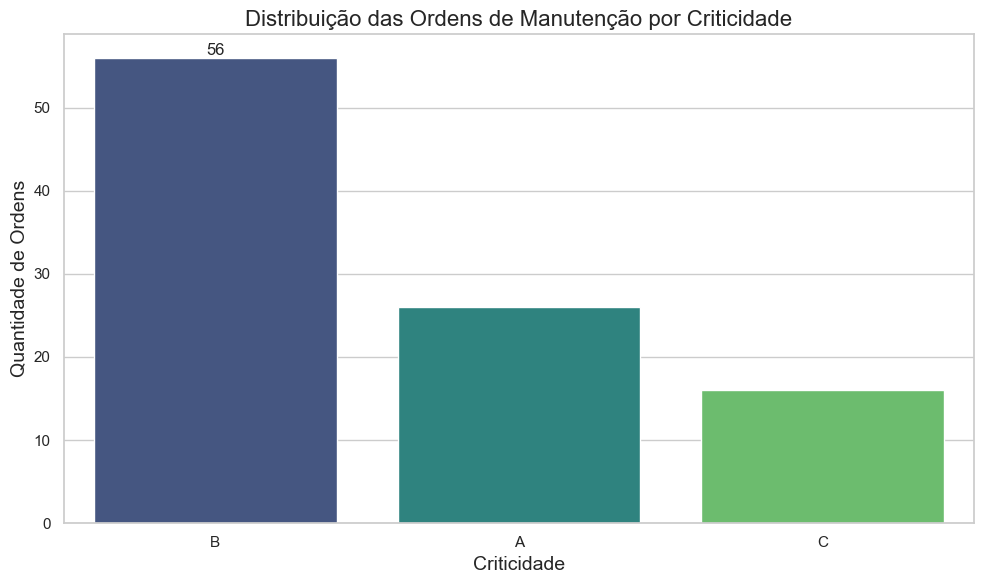

In [40]:
# Análise de Criticidade
criticidade = df['equipment_fields.criticality'].value_counts()

# Configuração de estilo para gráficos modernos
sns.set(style='whitegrid')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=criticidade.index, y=criticidade.values, palette='viridis')
ax.set_title(
    'Distribuição das Ordens de Manutenção por Criticidade', fontsize=16)
ax.set_xlabel('Criticidade', fontsize=14)
ax.set_ylabel('Quantidade de Ordens', fontsize=14)
ax.bar_label(ax.containers[0])
plt.tight_layout()

# Mostrar o gráfico
plt.show()

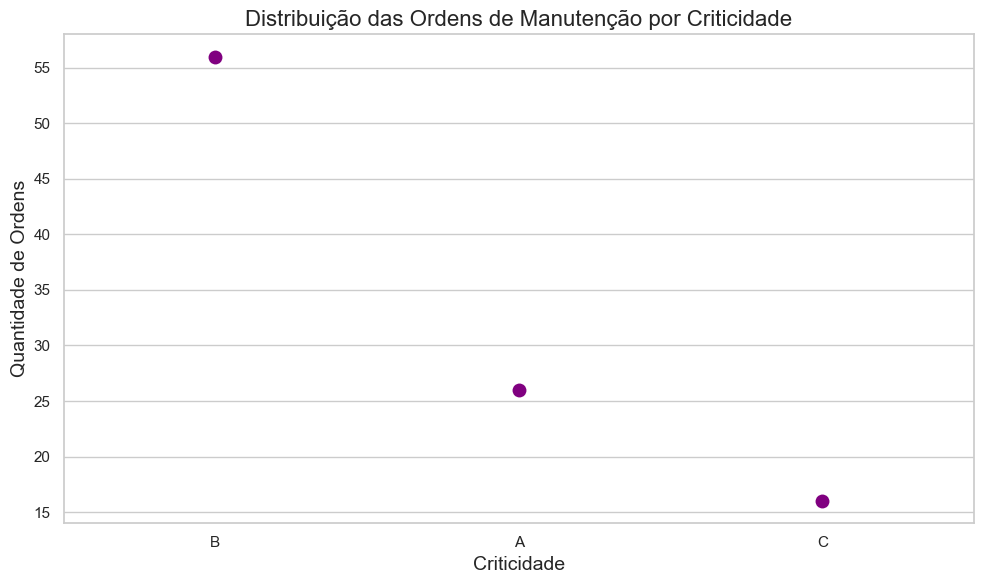

In [21]:
criticidade = df['equipment_fields.criticality'].value_counts()

# Configuração de estilo para gráficos modernos
sns.set(style='whitegrid')

# Criar o gráfico de pontos
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x=criticidade.index, y=criticidade.values,
                   size=10, color='purple')
ax.set_title(
    'Distribuição das Ordens de Manutenção por Criticidade', fontsize=16)
ax.set_xlabel('Criticidade', fontsize=14)
ax.set_ylabel('Quantidade de Ordens', fontsize=14)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/2549251760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_fields.duration'] = df_filtered['order_fields.duration'].astype(
/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/2549251760.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=duracao_media_criticidade.index,


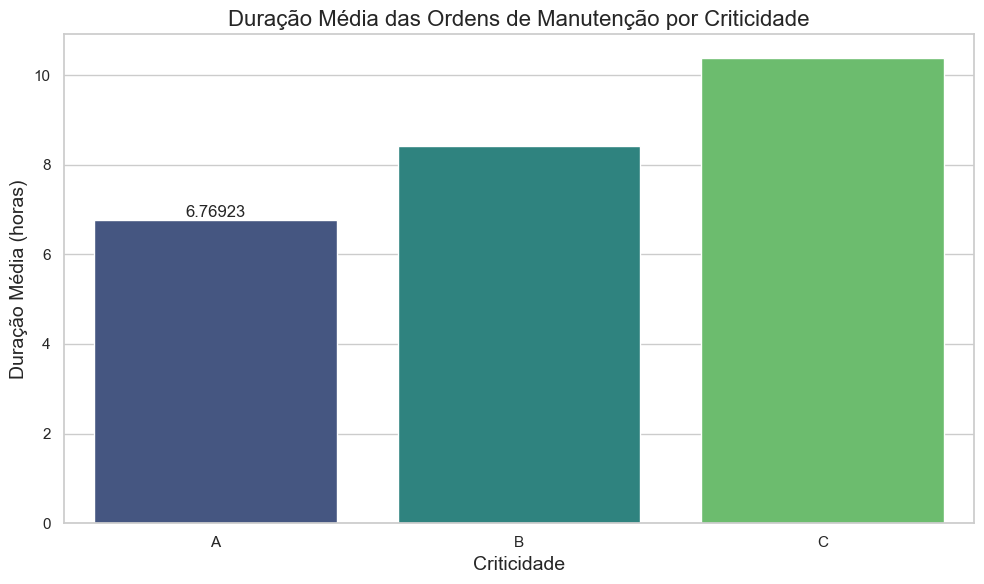

In [23]:
# Transformar os dados em um DataFrame do Pandas
df = pd.json_normalize(data)

# Filtrar colunas relevantes
df_filtered = df[['equipment_fields.criticality', 'order_fields.duration']]

# Converter a coluna 'duration' para float
df_filtered['order_fields.duration'] = df_filtered['order_fields.duration'].astype(
    float)

# Analisar a duração média por criticidade
duracao_media_criticidade = df_filtered.groupby('equipment_fields.criticality')[
    'order_fields.duration'].mean()

# Configuração de estilo para gráficos modernos
sns.set(style='whitegrid')

# Criar o gráfico de barras para duração média por criticidade
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=duracao_media_criticidade.index,
                 y=duracao_media_criticidade.values, palette='viridis')
ax.set_title(
    'Duração Média das Ordens de Manutenção por Criticidade', fontsize=16)
ax.set_xlabel('Criticidade', fontsize=14)
ax.set_ylabel('Duração Média (horas)', fontsize=14)
ax.bar_label(ax.containers[0])
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [31]:
# Transformar os dados em um DataFrame do Pandas
df = pd.json_normalize(data)

# Filtrar colunas relevantes
df_filtered = df[['equipment_fields.criticality', 'order_fields.duration']]

# Converter a coluna 'duration' para float
df_filtered['order_fields.duration'] = df_filtered['order_fields.duration'].astype(
    float)

# Criar o gráfico de boxplot
fig = px.box(df_filtered, x='equipment_fields.criticality', y='order_fields.duration',
             title='Distribuição das Durações das Ordens de Manutenção por Criticidade',
             labels={'equipment_fields.criticality': 'Criticidade',
                     'order_fields.duration': 'Duração (horas)'},
             color='equipment_fields.criticality',
             template='plotly_white')

# Mostrar o gráfico
fig.show()

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/2584580414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_fields.duration'] = df_filtered['order_fields.duration'].astype(


/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/2619054206.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=criticidade.index, y=criticidade.values, palette='viridis')


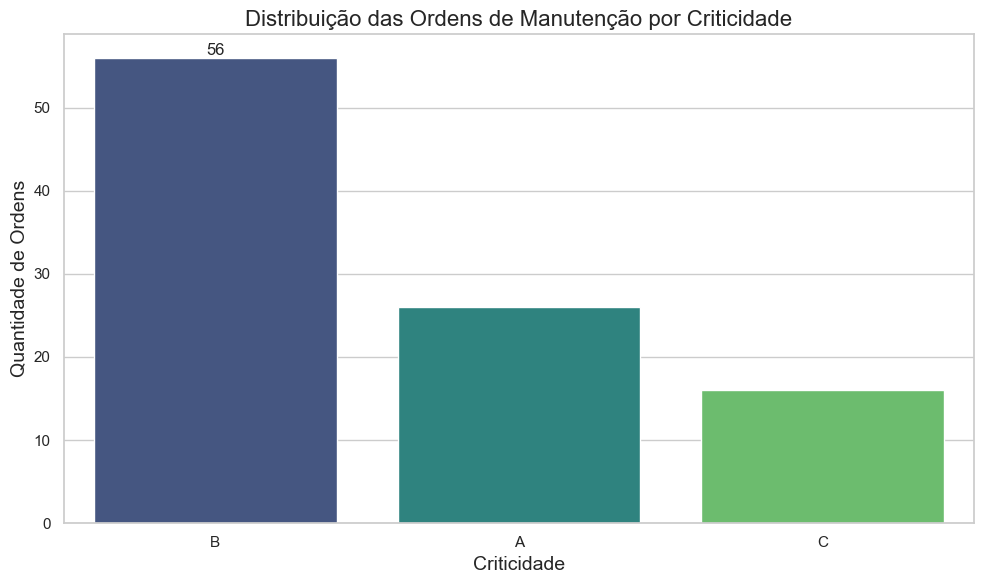

In [ ]:
# Análise de Criticidade
criticidade = df['equipment_fields.criticality'].value_counts()

# Configuração de estilo para gráficos modernos
sns.set(style='whitegrid')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=criticidade.index, y=criticidade.values, palette='viridis')
ax.set_title(
    'Distribuição das Ordens de Manutenção por Criticidade', fontsize=16)
ax.set_xlabel('Criticidade', fontsize=14)
ax.set_ylabel('Quantidade de Ordens', fontsize=14)
ax.bar_label(ax.containers[0])
plt.tight_layout()

# Mostrar o gráfico
plt.show()

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/4201211644.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/4201211644.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




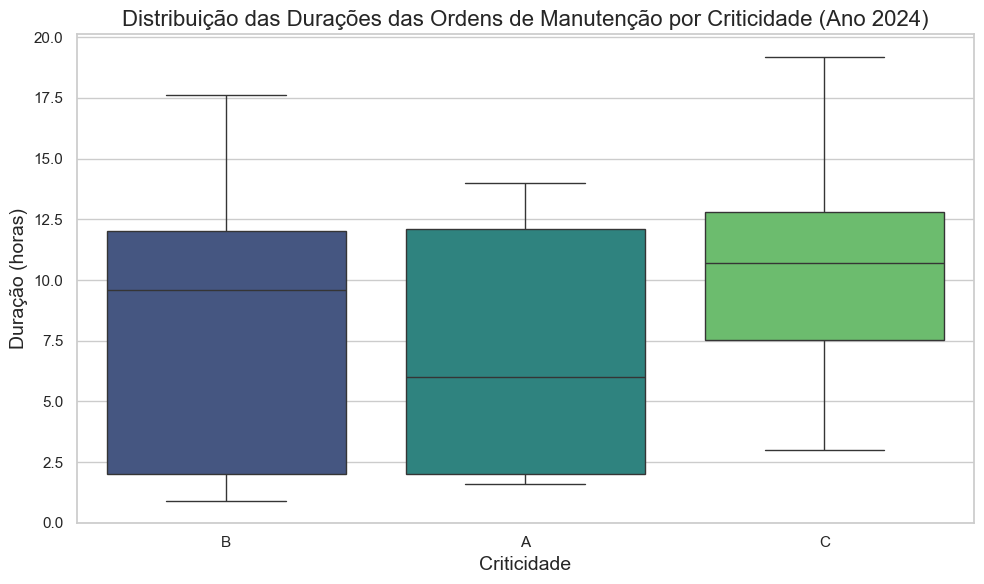

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/4201211644.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




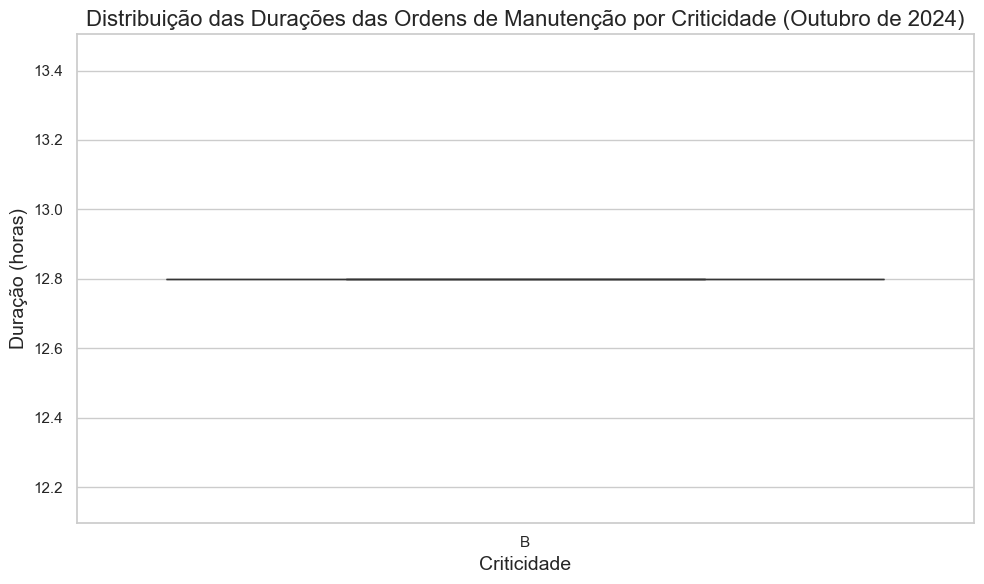

/var/folders/t0/9v4t04651s93690pqdrnntjr0000gn/T/ipykernel_90938/4201211644.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




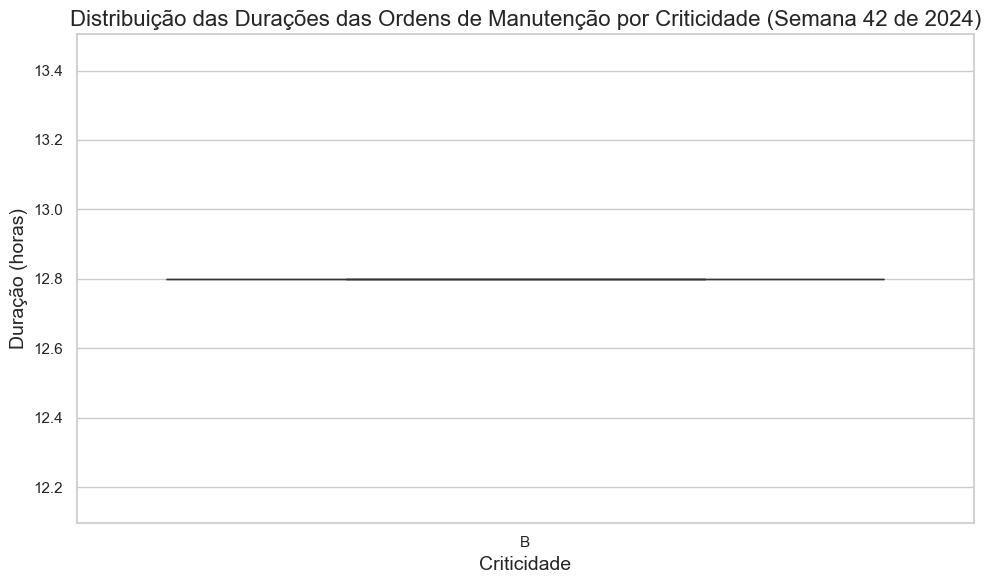

In [34]:
# Transformar os dados em um DataFrame do Pandas
df = pd.json_normalize(data)

# Converter a coluna 'start_date' para datetime
df['order_fields.start_date'] = pd.to_datetime(
    df['order_fields.start_date'], format='%d/%m/%Y')

# Adicionar colunas de ano, mês e semana
df['year'] = df['order_fields.start_date'].dt.year
df['month'] = df['order_fields.start_date'].dt.month
df['week'] = df['order_fields.start_date'].dt.isocalendar().week

# Filtrar colunas relevantes
df_filtered = df[['equipment_fields.criticality',
                  'order_fields.duration', 'year', 'month', 'week']]

# Converter a coluna 'duration' para float
df_filtered['order_fields.duration'] = df_filtered['order_fields.duration'].astype(
    float)

# Configuração de estilo para gráficos modernos
sns.set(style='whitegrid')

# Função para criar gráficos de boxplot filtrados por ano, mês ou semana


def create_boxplot(data, filter_col, filter_value, title_suffix):
    filtered_data = data[data[filter_col] == filter_value]
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='equipment_fields.criticality',
                     y='order_fields.duration', data=filtered_data, palette='viridis')
    ax.set_title(
        f'Distribuição das Durações das Ordens de Manutenção por Criticidade ({title_suffix})', fontsize=16)
    ax.set_xlabel('Criticidade', fontsize=14)
    ax.set_ylabel('Duração (horas)', fontsize=14)
    plt.tight_layout()
    plt.show()


# Exemplo: Criar gráficos de boxplot para o ano de 2023
create_boxplot(df_filtered, 'year', 2024, 'Ano 2024')

# Exemplo: Criar gráficos de boxplot para o mês de outubro de 2023
create_boxplot(df_filtered, 'month', 10, 'Outubro de 2024')

# Exemplo: Criar gráficos de boxplot para a semana 42 de 2023
create_boxplot(df_filtered, 'week', 42, 'Semana 42 de 2024')